# Geothermal potential - temperature
## Hypothesis test

**Objective**

Geothermal reservoirs with temperatures above 302 F are known to be classified as high-temperature reservoirs. And they are great for clean energy production. The goal of the data analysis is to determine whether the reservoirs described in our dataset can be classified as high-temperature reservoirs with a high degree of certainty.

**About the data**

The dataset is related to the reservoir temperature history report of wells drilled on a field in South America. It contains two (**02**) features, reservoir temperature and the depth of temperature measurement. The dataset has **71** records.

**Data exploration**

In this section, we check data consistency, identify missing and outliers values, describe the statistics of the features and set the target feature for our analysis. To perform this analysis we use some Python libraries such as Pandas, Numpy and Matplotlib.

## Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns

## Preprocessing data

### Load data and create a dataframe

In [8]:
file="data.csv"

In [9]:
df=pd.read_csv(file)

### Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temp        71 non-null     float64
 1   depth_feet  71 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


Dataset has two features (Temp and depth_feet), 71 records, and there are not missing values

---

In [5]:
df.describe()

,Temp,depth_feet
count,71.000000,71.000000
mean,291.983978,15114.790193
std,9.778567,770.037452
min,246.000000,13621.600745
25%,287.769200,14495.190000
50%,291.700000,15270.219362
75%,297.774000,15643.310000
max,316.936590,16923.000000


In the above table, we can see the main statistics of our dataframe such as mean, standard deviation, max/min values, and so on.

---

### Data visualization

Let's perform some charts to a better comprehension of the data.

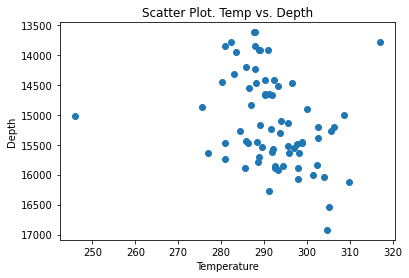

In [15]:
# Scatter plot

plt.scatter(df.iloc[:,0],df.iloc[:,1])

title = "Scatter Plot. Temp vs. Depth"
plt.title(title)

plt.xlabel("Temperature")
plt.ylabel("Depth")

ax = plt.gca()
ax.invert_yaxis()

plt.show()

As we can see on the scatter plot, the general behavior of temperature vs depth is correct because the temperature increase with more depth. Also, we can see two values of temperature that seem outliers.

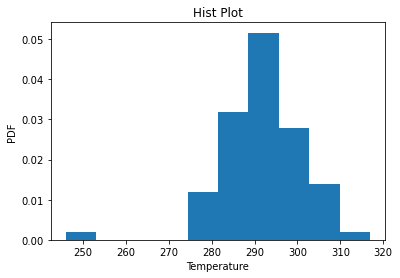

In [6]:
# Hist Plot

plt.hist(df.iloc[:,0], density=True)

title = "Hist Plot"
plt.title(title)

plt.xlabel("Temperature")
plt.ylabel("PDF")

plt.show()

Let's to perform a box chart of the data

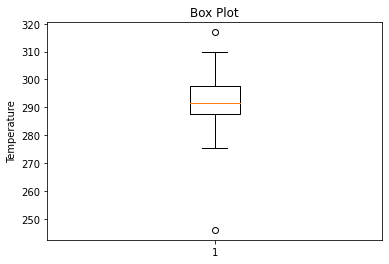

In [7]:
# Box Plot
plt.boxplot(df.iloc[:,0])

title = "Box Plot"
plt.title(title)

plt.ylabel("Temperature")

plt.show()

As we can clearly see on the Hist and Box plot, we have outliers values that we must identify and exclude from our dataset to perform our data analysis.

---

### Compute the outliers values using interquartile method

With the code below we identify the outliers values usisng interquartile method.

In [8]:
max, min, p25, p75 = df.iloc[:,0].max(), df.iloc[:,0].min(), np.percentile(df.iloc[:,0], 25), np.percentile(df.iloc[:,0], 75)

In [9]:
ll, hl = p25 - 1.5*(p75-p25), p75 + 1.5*(p75-p25)

In [10]:
outliers=[]

for x in df.iloc[:,0]:
    if x > hl or x < ll:
        outliers.append(x)            
outliers        

[246.0, 316.93659]

The dataset has 2 outliers values according the interquartile method.

### Delete the outliers values

In [11]:
def remove_outlier(df_in,col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [12]:
df=remove_outlier(df,'Temp')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 70
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    69 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


Let's to perform a box and hist plot with the clean data

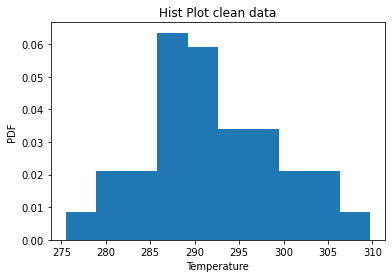

In [13]:
# Hist Plot

plt.hist(df.iloc[:,0], density=True)

title = "Hist Plot clean data"
plt.title(title)

plt.xlabel("Temperature")
plt.ylabel("PDF")

plt.show()

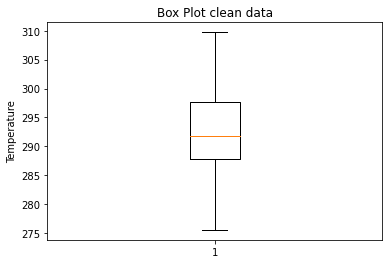

In [14]:
# Box Plot
plt.boxplot(df.iloc[:,0])

title = "Box Plot clean data"
plt.title(title)

plt.ylabel("Temperature")

plt.show()

Now that we have our clean dataset, we can continue to perform the data analysis.

### Target feature

According to the objective of the analysis, our target feature is temperature, so let us calculate the median and standard deviation of this sample as these data are needed to make our hypothesis test later.

In [15]:
Xhat, sigma = df.iloc[:,0].mean(), df.iloc[:,0].std()

print(Xhat, sigma)

292.2887801742062 7.621425357583482


Once we have been prepared the data, let's to perform a Hypothesis test.

## Hypothesis test

There are three posisble hypothesis:

---

Hypothesis 1:

$H_{0}$: $\hat{X} = \mu$

$H_{1}$: $\hat{X} \neq \mu$

---

Hypothesis 2:

$H_{0}$: $\hat{X} \le \mu$

$H_{1}$: $\hat{X} > \mu$

---

Hypothesis 3:

$H_{0}$: $\hat{X} \ge \mu$

$H_{1}$: $\hat{X} < \mu$

---

According to the objective of the analysis, we must probe the second hypothesis with a signifance value of 5%:

**Null hypothesis:** The average oh the temperature of the sample (292.29F) is equal to or less than 302 F.

**Alternative hypothesis:** The average oh the temperature of the sample (292.29F) is greater than 302 F.

Data:

$\hat{X} = 292.29° F$

$\mu = 302° F$

$s = 7.62° F$

$\alpha = 0.05$

---

To demostrate the alternative hypothesis &rarr; $H_{1}$: $\hat{X} > \mu$

To do that we assume that the temperatures measurements are normally distributed.

###  Probability calculations

In [16]:
mu=302

In [17]:
# Cumulative probability
cdf = norm.cdf(mu, Xhat, sigma)
print(str(round(cdf*100, 1))+"%")

89.9%


In [18]:
# Inverse cumulative probability
sf=norm.sf(mu, Xhat, sigma)
print(str(round(sf*100, 1))+"%")

10.1%


In [19]:
vals = norm.ppf([cdf])
print(vals)
print(norm.cdf(vals))

[1.27419995]
[0.89870372]


Let's to plot the results

In [20]:
#To plot the pdf and cdf results we must to sort the data scending
x = df.sort_values(by=['Temp']).iloc[:,0]
pdft = norm.pdf(x, Xhat, sigma)
cdft = norm.cdf(x, Xhat, sigma)

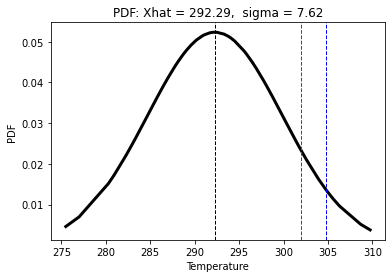

In [21]:
# Plot the PDF.

plt.plot(x, pdft, 'k', linewidth=3)

plt.axvline(norm.mean(Xhat, sigma), color='k', linestyle='dashed', linewidth=1)

plt.axvline(norm.ppf(0.95, Xhat, sigma), color='b', linestyle='dashed', linewidth=1)

plt.axvline(norm.ppf(cdf, Xhat, sigma), color='r', linestyle='dashed', linewidth=1)

title = "PDF: Xhat = %.2f,  sigma = %.2f" % (Xhat, sigma)
plt.title(title)

plt.xlabel("Temperature")
plt.ylabel("PDF")

plt.show()

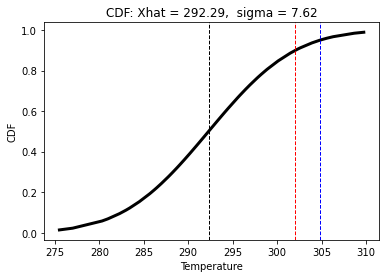

In [22]:
# Plot the CDF.

plt.plot(x, cdft, 'k', linewidth=3)

plt.axvline(norm.mean(Xhat, sigma), color='k', linestyle='dashed', linewidth=1)

plt.axvline(norm.ppf(0.95, Xhat, sigma), color='b', linestyle='dashed', linewidth=1)

plt.axvline(norm.ppf(cdf, Xhat, sigma), color='r', linestyle='dashed', linewidth=1)

title = "CDF: Xhat = %.2f,  sigma = %.2f" % (Xhat, sigma)
plt.title(title)

plt.xlabel("Temperature")
plt.ylabel("CDF")

plt.show()

According to the results, the cumulative probability of $\hat{X} > \mu$ is 89.9%, therefore we must **reject the alternative hypothesis** because it is less than 95%. (see PDF and CDF charts)

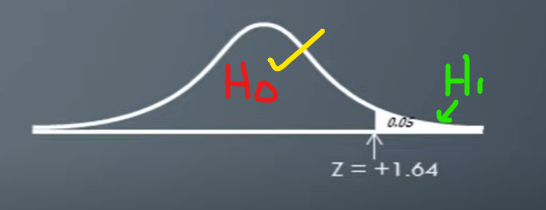

Let's to compute what is the temperature value with $\alpha = 0.05$.

In [23]:
ppf=norm.ppf(0.95, Xhat, sigma)
ppf

304.8249093161673

The temperature value with $\alpha = 0.05$ is 304.82° F

### Conclusion

1. **Reject the alternative hypothesis** because the CFD is 89.9% and is less than 95% necessary.

2. The average temperature of the sample must be 304.82 F to have 5% of significance.

Author: José Gregorio Pérez (perezjgg@gmail.com)
March/2022